In [5]:
# !pip install torch
!git clone https://github.com/ultralytics/yolov5 

  Using cached torch-1.13.1-cp310-cp310-win_amd64.whl (162.6 MB)


In [1]:
# !pip install matplotlib
# !pip install opencv-python
# !pip install pyyaml
# !pip install tqdm
# !pip install pandas
!cd yolov5 & pip install -r requirements.txt
# !pip install ipywidgets
# !pip install tensorboard

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [32]:
!cd Yolov5 && python train.py --img 1080 --batch 16 --epochs 3 --data dataset.yaml --weights yolov5s.pt
# !python train.py --resume /content/yolov5/runs/train/exp/weights/last.pt --epochs 5
# !python train.py --data dataset.yaml --weights /kaggle/working/yolov5/runs/train/exp/weights/last.pt --img 1080 --epochs 8

^C


In [2]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [65]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs_153/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\garvi/.cache\torch\hub\master.zip
YOLOv5  2023-3-25 Python-3.10.7 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


2160


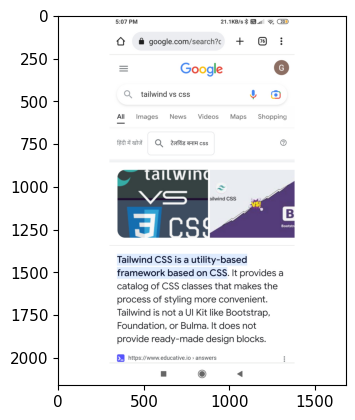

In [66]:
padded_img = cv2.imread(os.path.join('data', 'images', 'Screenshot_2023-03-25-17-07-27-581_com.android.chrome.jpg'))
old_image_height, old_image_width, channels = padded_img.shape
print(old_image_height)
new_image_height = old_image_height
new_image_width = old_image_width + 600
color = (255,255,255)
result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)
x_center = (new_image_width - old_image_width) // 2
y_center = (new_image_height - old_image_height) // 2

# copy img image into center of result image
result[y_center:y_center+old_image_height, 
       x_center:x_center+old_image_width] = padded_img

result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
%matplotlib inline
plt.imshow(result)

In [67]:
# img = os.path.join('data', 'images', 'WhatsApp Image 2023-03-08 at 00.36.35.jpg')
# results = model(img)

In [68]:
results = model(result)

In [69]:
results.print()

image 1/1: 2160x1680 2 mores, 1 menu, 2 searchs, 1 add, 1 home
Speed: 7.7ms pre-process, 279.8ms inference, 1.7ms NMS per image at shape (1, 3, 640, 512)


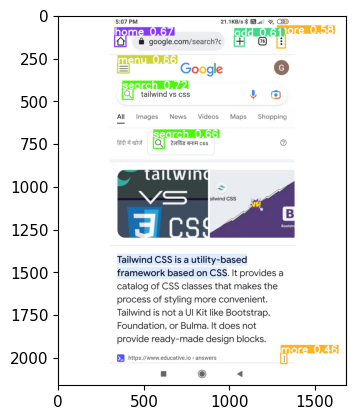

True

In [70]:
%matplotlib inline
img = np.squeeze(results.render())
plt.imshow(img)
plt.show()
cv2.imwrite('annotated_img.png', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [13]:
# import pickle

In [12]:
# pickle.dump(model,open('regmodel.pkl','wb'))

In [13]:
# pickled_model=pickle.load(open('regmodel.pkl','rb'))